In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
df=pd.read_csv("/content/Churn_Modelling.csv")

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
df

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X=df.drop(columns=['Exited'])

In [ ]:
y=df['Exited'].values

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
import tensorflow

In [ ]:
from tensorflow import keras

In [ ]:
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 11)                132       
                                                                 
 dense_8 (Dense)             (None, 11)                132       
                                                                 
 dense_9 (Dense)             (None, 1)                 12        
                                                                 
Total params: 276 (1.08 KB)
Trainable params: 276 (1.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5263 - accuracy: 0.7553 - val_loss: 0.4665 - val_accuracy: 0.7962
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4486 - accuracy: 0.7956 - val_loss: 0.4462 - val_accuracy: 0.8025
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4362 - accuracy: 0.8030 - val_loss: 0.4401 - val_accuracy: 0.8019
Epoch 4/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4296 - accuracy: 0.8062 - val_loss: 0.4363 - val_accuracy: 0.8087
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8142 - val_loss: 0.4307 - val_accuracy: 0.8181
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4185 - accuracy: 0.8203 - val_loss: 0.4247 - val_accuracy: 0.8225
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4114 - accuracy: 0.8258 - val_loss: 0.4178 - val_accuracy: 0.8275

In [ ]:
model.layers[0].get_weights()

[array([[ 3.34844850e-02, -3.06314491e-02,  1.79655086e-02,
          2.52762377e-01,  8.28980841e-03,  4.26882319e-02,
          2.24378742e-02, -1.48356169e-01,  6.63747406e-03,
          3.93901139e-01, -2.43279174e-01],
        [-5.57999492e-01, -2.12147877e-01,  2.21137106e-01,
         -9.89220381e-01, -1.36279687e-01, -7.26862311e-01,
         -3.27334255e-01, -8.41944218e-01,  8.92258883e-01,
         -1.06771328e-01, -5.45182824e-01],
        [-4.12570545e-03,  1.30778730e-01, -7.27664232e-02,
         -5.08455411e-02,  5.70109710e-02,  2.43692130e-01,
          5.78283787e-01,  2.81856596e-01,  1.75901175e-01,
         -4.09596443e-01,  3.46915841e-01],
        [ 2.68735826e-01, -2.37609819e-01,  5.11557937e-01,
          1.56148627e-01, -1.26530558e-01,  2.70774156e-01,
         -5.88013053e-01,  3.56706738e-01, -1.81722850e-01,
         -7.08904028e-01, -5.22272170e-01],
        [-3.25416028e-01,  1.60006553e-01,  8.40767682e-01,
         -2.84131896e-02, -1.40979230e+00, -

In [ ]:
model.layers[1].get_weights()

[array([[-0.3710876 , -0.2634248 , -0.19533515,  0.19562559,  0.12144404,
          0.02352261, -0.13362977, -0.5835255 ,  0.6726491 ,  0.5988292 ,
          0.21036562],
        [-0.32881388,  0.36048484,  0.6438639 ,  0.01869486, -0.15918362,
         -0.00395484, -0.3312339 ,  0.1856071 ,  0.37253895,  0.42312062,
         -0.04957358],
        [ 0.38093373,  0.56577075, -0.72650075, -0.37593547,  0.91077864,
          0.7482446 ,  0.1376947 , -0.04666019, -0.21626008, -0.27195406,
         -0.12241942],
        [-0.06377131, -0.3414687 , -0.428138  ,  0.2858925 , -0.7191938 ,
          0.1631738 , -0.06722279,  0.12372699,  0.3121532 ,  0.56945944,
          0.34539518],
        [-0.3020531 ,  0.76653785, -0.53407764, -0.2604475 ,  0.77612484,
          0.03057904, -0.42816517, -0.5977596 , -0.06460471, -0.26658702,
         -0.1288013 ],
        [-0.1911356 , -0.37762684,  0.6643394 , -0.4729839 , -0.73104656,
          0.45971027,  0.5248204 , -0.44463405, -0.16370633, -0.0424480

In [ ]:
y_log=model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
accuracy_score(y_test,y_pred)

0.858

In [ ]:
history.history

{'loss': [0.5263118743896484,
  0.4486382305622101,
  0.43622156977653503,
  0.42961418628692627,
  0.4245350956916809,
  0.4185340106487274,
  0.41135871410369873,
  0.4042542576789856,
  0.39688795804977417,
  0.3892134428024292,
  0.3807900547981262,
  0.3737407922744751,
  0.365822970867157,
  0.35841408371925354,
  0.35360729694366455,
  0.3500825762748718,
  0.34606361389160156,
  0.3441324532032013,
  0.3424939215183258,
  0.34155821800231934,
  0.33964672684669495,
  0.33865106105804443,
  0.3384362757205963,
  0.33745330572128296,
  0.33639267086982727,
  0.3358997702598572,
  0.3353241980075836,
  0.33455657958984375,
  0.33419305086135864,
  0.3331896662712097,
  0.3330398201942444,
  0.3334074020385742,
  0.33206847310066223,
  0.33210840821266174,
  0.33207693696022034,
  0.33126193284988403,
  0.3307379186153412,
  0.33077916502952576,
  0.3304612636566162,
  0.3298308253288269,
  0.3295537829399109,
  0.32908865809440613,
  0.3291003406047821,
  0.3287297785282135,
  0.3

In [ ]:
import matplotlib.pyplot as plt


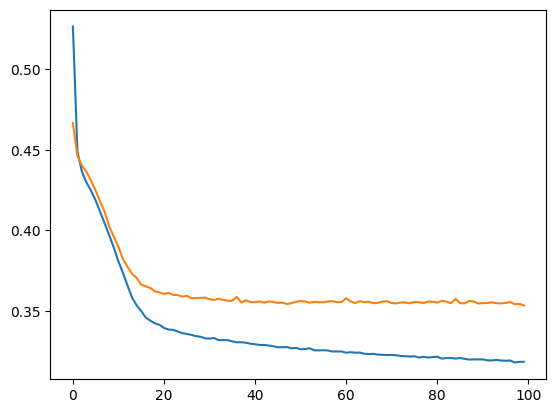

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

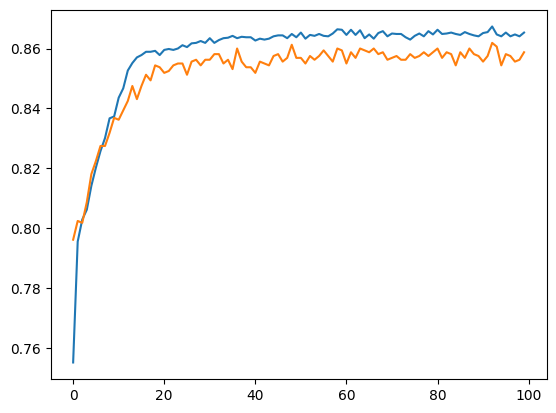

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])